In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
import joblib
import warnings
warnings.filterwarnings("ignore")

In [18]:
data = pd.read_csv("preprocesseddata1.csv",sep=',')
data = data.drop(["Unnamed: 0"],axis=1)
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.700000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,1,62,0,32.0,416.600000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
597,1,64,0,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
598,1,64,0,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
599,1,46,0,33.0,93.220833,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [19]:
y = data['Category']
X = data.drop(['Category'],axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=42)

In [21]:
# normalization
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-1.2625086 , -1.2477252 ,  0.07079832, ..., -0.28296277,
        -0.44158634, -1.64775638],
       [ 0.91462758,  0.80145852,  0.75250713, ...,  0.19032986,
        -0.40196106,  0.45080981],
       [-0.32945024, -1.2477252 , -1.12679823, ..., -0.33555083,
        -0.57424486, -1.42579265],
       ...,
       [-0.74414284,  0.80145852, -0.48193855, ..., -0.21459828,
         1.49143784,  1.82294923],
       [ 0.18891552,  0.80145852,  0.51298782, ..., -0.17778663,
        -0.46742891,  0.00688234],
       [ 0.49993498,  0.80145852,  0.95517732, ...,  0.10268307,
        -0.32615619,  0.20866755]])

In [22]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test,y_test)

0.9470198675496688

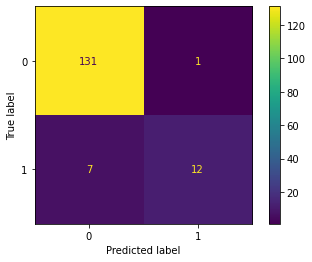

In [23]:
ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test)
plt.show()

In [24]:
y_pred = gnb.predict(X_test)
print(classification_report(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       132
           1       0.92      0.63      0.75        19

    accuracy                           0.95       151
   macro avg       0.94      0.81      0.86       151
weighted avg       0.95      0.95      0.94       151

0.8120015948963317


In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.9801324503311258

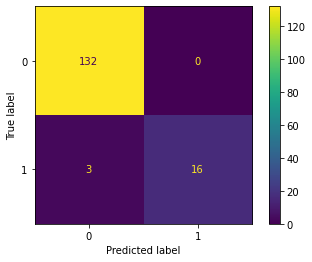

In [26]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.show()

In [27]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       132
           1       1.00      0.84      0.91        19

    accuracy                           0.98       151
   macro avg       0.99      0.92      0.95       151
weighted avg       0.98      0.98      0.98       151

0.9210526315789473


In [28]:
svc = svm.SVC(kernel='rbf',C=6)
svc.fit(X_train, y_train)
svc.score(X_test,y_test)

0.9735099337748344

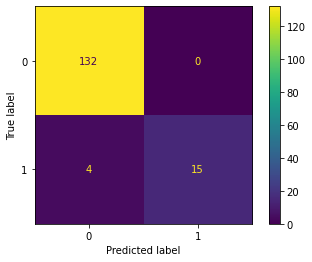

In [29]:
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)
plt.show()

In [30]:
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       132
           1       1.00      0.79      0.88        19

    accuracy                           0.97       151
   macro avg       0.99      0.89      0.93       151
weighted avg       0.97      0.97      0.97       151

0.8947368421052632


In [31]:
logReg = joblib.load("Model/logReg_model.joblib")

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)
lr.score(X_test,y_test)

0.9536423841059603

In [43]:
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       132
           1       0.93      0.68      0.79        19

    accuracy                           0.95       151
   macro avg       0.94      0.84      0.88       151
weighted avg       0.95      0.95      0.95       151

0.838317384370016


In [36]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
parameters = {"n_neighbors": range(1,10)}
knn = GridSearchCV(neigh, parameters)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.9536423841059603

In [34]:
knn.best_params_

{'n_neighbors': 1}

In [37]:
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       132
           1       0.88      0.74      0.80        19

    accuracy                           0.95       151
   macro avg       0.92      0.86      0.89       151
weighted avg       0.95      0.95      0.95       151

0.8608452950558214


In [44]:
classifiers = {"Gaussioan Naive Bayes":gnb,"Random Forest":rf,"Support Vector Machine":svc,"K-Nearest Neighbors":knn,"Logstic Regression":lr}

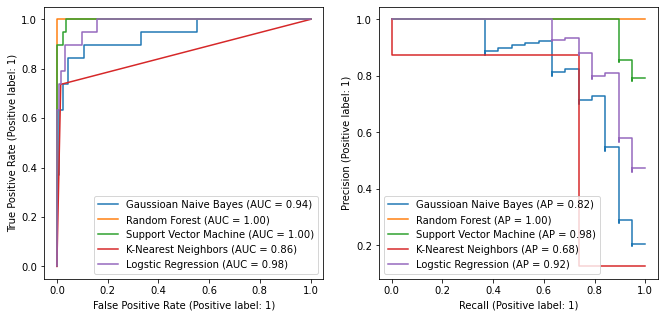

In [50]:
fig, [ax_roc, ax_pr] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():

    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax=ax_pr, name=name)

myfig = plt.gcf()
plt.show()
myfig.savefig('roc.png')